<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ivette Landaverde Mercado, Diego Pintor Ochoa.

**Fecha:** XX de marzo del 2021.

**Expediente** : if722626, if726622.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/PintorOD1997/ProyectoConjunto_LandaverdeI_PintorD

# Proyecto TEMA-2

### 1.1 Título del trabajo:



<div style="text-align:center"><span style="color:#154898; font-family: 'Bebas Neue'; font-size: 4em;">  Febrero loco y marzo otro poco </span></div> </p>



<img style="float: center; margin: 0px 0px 15px 230px;" src="https://di-uploads-pod14.dealerinspire.com/toyotaoforlando/uploads/2019/08/driving-in-the-rain-1024x683.jpg" width="500px" height="300px" />


## <font color='navy'> 1.2 Objetivos.
#### 1.1 Objetivo general:
    
- El objetivo de este proyecto es simular el comportamiento de los patrones climáticos durante una de las cuatro estaciones del año a través de las siguientes variables: húmedad, presión, temperatura, presión del viento y velocidad del viento para posteriormente calcular la probabilidad de lluvia en Seattle.
    
#### 1.2 Objetivos específicos:
- Definir estaciones del año, en las que se puedan encuadrar patrones climáticos para la ciudad de Seattle. 
- Correlacionar la lluvia con otros indicadores como la humedad, dirección del viento, velocidad del viento y temperatura.
- Simular escenarios para la estación del año elegida; la que consideremos tiene menos probabilidad de lluvia de acuerdo al análisis de datos.
- Enunciar la probabilidad de que llueva en una estación dada del año para Seattle.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


## <font color='navy'> 1.3 Definición del problema

Queremos predecir la probabilidad de lluvia ya que se simularemos que tenemos un autolavado en la ciudad de Seattle que ofrece garantías en caso de lluvia. 
> La premisa es: **si acudes a lavar tu carro y al día siguiente llueve, tu siguiente lavada es gratis.**

Sería sencillo simplemente no ofrecer la garantía en las temporadas de lluvía cuando la probabilidad de que llueva es especialmente alta por lo cual no nos convendría, sin embargo, las lluvias ya no son tan estables y no son exclusivas de una temporada y esto se debe al cambio climático que atribuye un factor estócastico; ahora puede llover en cualquier mes y época del año.

Nosotros usaremos datos relativamente recientes para reducir la probabilidad de error y por lo tanto conocer en que meses no deberíamos ofrecer la garantía de lavado gratis post-lluvia.


¿Cómo afecta el cambio climático a la lluvia?


Uno de los factores más críticos a la hora de determinar el impacto del cambio climático es el cambio en la lluvia y otros tipos de precipitaciones. La lluvia se ha vuelto mucho más difícil de predecir que la temperatura, pero existen algunas declaraciones que los científicos pueden asegurar en el futuro cercano.


Una atmósfera más cálida puede almacenar mayor cantidad de humedad, y la cantidad de vapor de agua global se incrementa aproximadamente en un 7% por cada grado centígrado de calentamiento extra. Cómo se traduce esto a cambios en las precipitaciones globales es poco claro, pero el volumen total de precipitaciones puede incrementarse aproximadamente de un 1% a un 2% por grado centígrado de calentamiento.


Existe evidencia para mostrar que las regiones que son húmedas se van a volver más húmedas, pero los detalles de que tan más húmedo se van a volver son más difíciles de asegurar. Son estos cambios en los patrones climáticos que harán la predicción de lluvia particularmente difícil. (Met 2011)




Con la mayor cantidad de días lluviosos que otra gran ciudad americana, Seattle tiene una reputación de precipitaciones frecuentes. En promedio, por año, llueven 150 días. Sin embargo, debido a que las precipitaciones en Seattle suelen ser lloviznas ligeras, Seattle recibe menos precipitaciones totales que otras ciudades. 
En noviembre, Seattle promedia más precipitaciones que otras ciudades grandes; también los inviernos son particularmente húmedos. Los meses más húmedos son noviembre, diciembre y enero. (NOAA 2014)




## <font color='navy'>  1.4 Nodos y variables: 
Tenemos un conjunto de datos sobre distintos atributos climáticos de 36 ciudades de las cuales nos enfocaremos específicamente en Seattle.

Las mediciones están hechas por hora e incluyen:

- Húmedad

- Presión

- Temperatura

- Presión del viento
    
- Velocidad del viento

- Descripción del clima

Además contamos con información general de las ciudades: en que país se encuentran, su latitud y longitud.


## <font color='navy'> 1.5 Definición de hipótesis y supuestos
    
### Supuestos:

- Todos los datos son correctos y con la misma precisión de medición 
- Los datos fueron medidos con la misma frecuencia
- Es posible determinar la distribución de probabilidad de cada variable
- Las estaciones del año están definidas por meses:
    * Primavera: marzo, abril y mayo
    * Verano: junio, julio y agosto
    * Otoño: septiembre, octubre y noviembre
    * Invierno: diciembre, enero y febrero
    
    De esta manera nos aseguramos de que cada estación tenga aproximadamente los mismos datos y conseguimos resultados visualmente sencillos de analizar.
    
### Hipótesis:
 
- Podemos predecir la probabilidad de lluvia a través de la simulación de las variables que acompañan a este fenómeno.



## <font color='navy'>  Conceptos y definiciones importantes:
    
**Distribución de probabilidad:** 
$$ \textbf{Función de distribución de probabilidad}\\ F(x)= \frac{1}{\sigma\sqrt(2\pi)}\int_{-\infty}^{x}e^{\frac{-(v-\mu)^2}{2\sigma^2}}dv$$
    
**Distribución normal:**

<img style="float: center; margin: 0px 0px 10px 350px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Normal_distribution_pdf.png/325px-Normal_distribution_pdf.png" width="300px" height="200px" />    

**Propiedades:**    

<img style="float: center; margin: 0px 0px 10px 350px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" width="300px" height="200px" />      
    
**Chi cuadrada:**

Sirve para someter a prueba hipótesis referidas a distribuciones de frecuencias. En términos generales, esta prueba contrasta frecuencias observadas con las frecuencias esperadas de acuerdo con la hipótesis nula.
    
**Histograma:**

Un histograma es la representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua.
    
**Boxplot:**

La gráfica box-plot es utilizada para visualizar la distribución de una variable numérica de la manera más simplificada posible. Sólo utiliza los valores de los cuartiles, los extremos (el mínimo y el máximo) y valores raros o outliers.
    
**Método de la transformada inversa:** 
    
Se utiliza en observación aleatoria tomando x como la variable aleatoria involucrada lo cual se logra mediante la función acumulada 
    $$F(x)=P(X\leq x),\quad \forall x$$
y la generación de números pseudoaleatorios  
    $$X = F^{-1}(U),\quad U \sim \text{Uniforme[0,1]}$$ 

## <font color='navy'> Diagrama:
    
El siguiente diagrama muestra como vamos a manejar las variables para calcular la probabilidad de lluvia.

![alt text](diagrama.png "diagrama")

## <font color='navy'>  1.6 Obtención de bases de datos y visualización:
La base de datos la obtuvimos de la comunidad Kaggle, la información ya está acomodada con el mismo eje común (tiempo) y la misma perioricidad (por hora).
Cada atributo está en un archivo distinto en donde las filas contienen el eje del tiempo y las columnas son las diferentes ciudades para cada archivo.
 
> Fuente: https://www.kaggle.com/selfishgene/historical-hourly-weather-data/code

Estos son los datos a utilizar:

In [1]:
#Librerías:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot
import itertools

In [2]:
data1 = pd.read_csv('weather_description.csv').dropna()
data1.head(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds


In [3]:
data=pd.read_csv("city_attributes.csv")
data.iloc[3]

City               Seattle
Country      United States
Latitude           47.6062
Longitude         -122.332
Name: 3, dtype: object

In [4]:
data2=pd.read_csv("humidity.csv")
humedad = data2["Seattle"].dropna()
humedad.sample(2)


29587    87.0
40709    71.0
Name: Seattle, dtype: float64

In [5]:
humedad.describe()

count    44964.000000
mean        77.159038
std         18.147464
min         13.000000
25%         66.000000
50%         81.000000
75%         93.000000
max        100.000000
Name: Seattle, dtype: float64

In [6]:
#Presión:
data3=pd.read_csv("pressure.csv")
presion = data3.Seattle.dropna()
data3.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
42762,2017-08-18 06:00:00,1020.0,1020.0,1016.0,1021.0,1016.0,1016.0,1015.0,1012.0,1021.0,...,1014.0,1014.0,1013.0,1016.0,983.0,1010.0,1008.0,1009.0,1009.0,1010.0
40614,2017-05-20 18:00:00,1022.0,1023.0,1016.0,1023.0,1013.0,1012.0,1018.0,1013.0,1021.0,...,1027.0,1026.0,1029.0,1020.0,988.0,1015.0,1012.0,1014.0,1014.0,1015.0


In [7]:
presion.describe()

count    45240.000000
mean      1021.001216
std          9.737187
min        980.000000
25%       1015.000000
50%       1020.000000
75%       1027.000000
max       1058.000000
Name: Seattle, dtype: float64

In [8]:
#Temperatura:
data4=pd.read_csv("temperature.csv")
temper = data4.Seattle.dropna()-273.15 #de kelvin a cº
data4.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
13643,2014-04-22 23:00:00,286.21,284.14000,289.200000,284.170000,293.290000,292.660000,300.510000,307.240000,298.490000,...,292.00000,290.22,281.14,290.980000,287.460,288.20,290.76,291.66,291.66,288.34
27503,2015-11-21 11:00:00,268.72,273.79731,282.417151,273.709631,283.938598,282.246337,278.684693,281.495237,273.433788,...,275.80948,275.76,271.48,276.196598,290.637,298.66,298.36,296.15,296.15,298.62


In [9]:
temper.describe()

count    45250.000000
mean        11.259626
std          6.547986
min         -9.370000
25%          6.680000
50%         10.790000
75%         15.380000
max         34.150000
Name: Seattle, dtype: float64

In [10]:
#Dirección del viento
data6=pd.read_csv("wind_direction.csv")
wind_dir = data6.Seattle.dropna()
data6.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
38120,2017-02-05 20:00:00,150.0,80.0,190.0,150.0,110.0,262.0,100.0,82.0,0.0,...,230.0,320.0,230.0,270.0,327.0,0.0,20.0,354.0,354.0,130.0
13758,2014-04-27 18:00:00,190.0,200.0,220.0,210.0,0.0,190.0,340.0,190.0,280.0,...,290.0,320.0,350.0,60.0,309.0,20.0,253.0,349.0,349.0,360.0


In [11]:
wind_dir.describe()

count    45252.000000
mean       161.380226
std        103.206816
min          0.000000
25%         70.000000
50%        175.000000
75%        218.000000
max        360.000000
Name: Seattle, dtype: float64

In [12]:
#Velocidad del viento:
data7=pd.read_csv("wind_speed.csv")
wind_speed = data7.Seattle.dropna()
data7.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
38074,2017-02-03 22:00:00,2.0,3.0,8.0,2.0,1.0,3.0,6.0,1.0,6.0,...,2.0,4.0,8.0,4.0,1.0,1.0,3.0,2.0,2.0,1.0
22311,2015-04-19 03:00:00,1.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,6.0,...,3.0,4.0,4.0,5.0,1.0,1.0,2.0,0.0,0.0,1.0


In [13]:
wind_speed.describe()

count    45252.000000
mean         2.118116
std          1.629988
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: Seattle, dtype: float64

## <font color='navy'>  Funciones a utilizar:

In [14]:

#Función histograma:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
# Función que ajusta las mejores distribuciones

# Observación gráfica, selección de distribución óptima
def best_fit_params(variable: "Variable aleatoria a ajustar"):
    """
    Función de ajuste para distribución óptima de variables aleatorias.
    Esta función recibe sólo una variable, "variable", la cuál es una de las variables aleatorias
    utilizadas en este proyecto.
    Crea un sample de la variable aleatoria para evitar tener que trabajar con todos los datos,
    esta sample se almacena en la variable datos. Luego, genera un histograma del sample para dar
    una idea de como se ve la variable aleatoria. Se almacena en la variable x el eje x del
    histograma. Se crea una variable llamada dist, que consiste en una lista de las primeras
    50 distribuciones continuas en la librería stats de scipy, además de la variable de
    referencia normal. Se crea un dataFrame de error para registrar el error cuadrático promedio.
    Se itera sobre la lista de distribuciones, se encuentra el error y se almacena en el dataFrame.
    Ordena el dataframe de menor a mayor, se almacena un slice de los primeros 5 valores y se 
    crea una lista de estas distribuciones. Por último, itera sobre el slice de los 5 valores,
    y grafica las funciones de densidad de probabilidad sobre el histograma para mostrar el 
    resultado. Se almacenan los parámetros de estas funciones en una lista.
    Esta función regresa la distribución con menor error y sus parámetros, en dos variables.
    (distribucion, parametros = best_fit_params(variable))
    """
    datos = variable.sample(1000)
    y,x,_ = plt.hist(datos,bins="auto",density=True)
    x = x[1:]
    dist = [d for d in dir(st) if isinstance(getattr(st,d),getattr(st,"rv_continuous"))]
    dist = dist[0:50] + ["norm"]
    error = pd.DataFrame(index = dist, columns=["error"])
    for d in dist:
        params = getattr(st,d).fit(datos)
        y_hat = getattr(st,d)(*params).pdf(x)
        error.loc[d] = ((y - y_hat)**2).mean()
    menor_error = error.sort_values(by="error")
    menor_error = menor_error[0:5]
    dists_menor_error = menor_error.index
    distribucion_menor_error = []
    parametros = []
    for d in dists_menor_error:
        distribucion_menor_error.append(getattr(st,d))
        params = getattr(st,d).fit(datos)
        y_hat = getattr(st,d)(*params).pdf(x)
        parametros.append(params)
        plt.plot(x,y_hat,label=d)
    plt.legend()
    return distribucion_menor_error[0], parametros[0]



#Prueba de intervalos de confianza
def intervalo_confianza(m:"Media de la distribución original",sim:"Variable simulada",c="Intervalo de confianza"):
    """
    Esta función crea una estimación del intervalo de confianza para la media de la variable simulada, y genera prueba de
    hipótesis, además de aceptarla o rechazarla, para una variable aleatoria normal. Imprime el intervalo de confianza para
    t-Student, normal, la media calculada de la variable simulada, una media rechazable, el estadístico de student, el valor
    de p para la prueba, la región de rechazo y el cálculo del estadístico de prueba teórico (uf!)
    """
    N = len(sim)
    i_t = st.t.interval(c, len(sim)-1, loc=np.mean(sim), scale=st.sem(sim))
    i_n = st.norm.interval(c, loc=np.mean(sim), scale=st.sem(sim))
    media_calc = np.mean(sim)
    # prueba de hipotesis para H0= mu=media2
    ho = st.ttest_1samp(sim, media_calc)
    # Calculamos el estadístico normalizado
    t = (np.mean(sim) - media_calc)/(np.std(sim) / np.sqrt(N))
    # Cálculo de la región de rechazo
    cuantil = st.t(N-1).cdf(c/2)
    print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(c,i_t))
    print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(c,i_n))
    print('Media calculada' ,np.mean(sim))
    print('La prueba de hipótesis arroja como resultado\n',ho)
    print('Cálculo del estadístico de prueba teórico=', t)
    print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')
    if ho.pvalue > c:
        print("Se acepta la hipótesis nula, la media es igual a",media_calc,"con un",c,"% de confianza.")
    else:
        print("Se rechaza la hipótesis nula. La media es diferente de",media_calc)
        
# Reducción de varianza, estratificación
def estratificacion(B = 1000):
    """
    Función estratificación: 
    Esta función crea B números aleatorios uniformes estratificados, con el propósito de reducir
    la varianza en la función aleatoria creada.
    Valor Default B es 1000. Esto quiere decir que se crearán 1000 aleatorios espaciados
    uniformemente.
    """
    i = np.arange(0,B)
    U = np.random.rand(B)
    return (U + i)/B
# Generación de variables aleatorias

#Función aceptación / rechazo
def a_r(f: "Función KDE",f_max: "Máximo de la función",dom: "Dominio de la función" ,N = 1000):
    """
    Función Aceptación/Rechazo. Esta función crea variables aleatorias mediante el criterio de
    aceptación rechazo, a partir de la función generada por el KDE anteriormente. Recibe la 
    función generada por el KDE, el máximo de esta función, y un vector de aleatorios uniformes.
    Se recomienda que el vector de aleatorios uniformes sea generado mediante estratificación.
    Si la función no recibe un vector de uniformes, genera uno mediante la función estratificación
    por default.
    
    """
    a = dom[0]
    b = dom[-1]
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,f_max) 
        R1 = np.random.uniform(a,b,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X
    
#Para KDE:
def kde_statsmodels_m(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    from statsmodels.nonparametric.kernel_density import KDEMultivariate
    kde = KDEMultivariate(x, 
                          #bw=0.1,  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)
def max_func(f: "Función de KDE a maximizar",dominio: "Espacio generado para el KDE"):
    """
    Función maximizador de función. Esta función maximiza la función obtenida por el KDE en el 
    dominio generado para esta misma (generalmente variable space). Regresa el máximo. Necesaria
    para la función de aceptación rechazo.
    """
    from scipy import optimize
    x = dominio
    return f(optimize.fmin(lambda x:-f(x),0,disp=False))

# Transformada inversa
def trans_inversa(dist, params, size):
    y_hat = dist.rvs(*params,size)
    return y_hat

# Prueba cuantil cuantil
def qq(var: "Variable a comprobar",dist: "Distribución a comprobar",params: "Parámetros distribución"):
    """
    Función qq. Prueba cuantil cuantil. Esta función crea el plot de la prueba cuantil cuantil,
    ("qq"), para la variable dada y la distribución dada. La variable debe ser la colección de 
    frecuencias de una variable aleatoria generada. La distribución debe ser dada por la librería
    Stats de Scipy. No regresa valores. Grafica el plot de la prueba qq.
    """
    fig, ax = plt.subplots(2,1)
    y,x,_ = ax[0].hist(var,bins="auto",density=True)
    x = x[:-1]
    y2 = dist.pdf(x,*params)
    ax[0].plot(x,y,"g--")
    ax[0].set_ylabel("Probabilidad")
    import statsmodels.api as sm
    sm.qqplot(var,dist=dist,line="q",fit=True,ax=ax[1])
    plt.grid()
    ax[1].set_ylabel("Cuantiles")
#Chi cuadrada    
def chi2(dist: "Distribución a probar",param: "Parámetros",y: "Frecuencias",x:"Histograma"):
    """
    Prueba de Chi Cuadrada. Esta función realiza la prueba de chi cuadrada para una distribución
    dada, con parámetros dados, y el histograma de la distribución obtenido. Obtiene la función
    de distribución de probabilidad de la distribución dada, y calcula el estadístico de Chi2
    para poder determinar si se acepta o se rechaza la Hipótesis Nula. Calcula los grados de 
    libertad en base a la longitud de datos recibidos del histograma. No regresa valores.
    """
    J = len(x)
    pi = dist.pdf(x,*param)
    #Cálculo de Esperanza de la distribución teórica
    Ei = x*pi
    #Cálculo teórico de la chi2
    chi2 = ((y - Ei)**2 / Ei).sum()
    print("Valor teórico de Chi2 =",chi2)
    #Cálculo mediante librería de chi2
    CHI2 = st.chisquare(y,Ei)
    print("Valor por librería de Chi2 =",CHI2)
    #Grados de libertad
    m = J-1
    #Obtención del estadístico de Chi2
    Chi_st = st.chi2.ppf(q=0.95,df=m)
    print("Estadístico de Chi2 =", Chi_st)   


## <font color='navy'> Representación de Variables Aleatorias

In [15]:
#Temperatura, medida en grados celsius
#Humedad en porcentaje 0 - 100
#Presión, dada en Hectopascales
#Velocidad del viento en millas por hora
#Dirección del viento en grados (0 - 360)
#plt.hist(wind_speed)
#Distribución normal para la temperatura, con características
temp_mean = temper.mean()
temp_sd = temper.std()
temp_sim = np.random.normal(loc=temp_mean,scale=temp_sd,size=12000)
#Distribución desconocida para la humedad(pedir ayuda), con características   (# está sesgada )
hum_mean = humedad.mean()
humedad_sim = st.expon(loc=0,scale=hum_mean).rvs(size=10000, random_state=123)
#Distribución normal para la presión
presion_mean = presion.mean()
presion_sd = presion.std()
presion_sim = st.norm(loc=presion_mean,scale=presion_sd).rvs(size=10000)
#Distribución exponencial para la velocidad del viento, con características
wS_mean = wind_speed.mean()
wS_sd = wind_speed.std()
wS_sim = st.expon(loc=0,scale=wS_mean).rvs(size=45000, random_state=69)

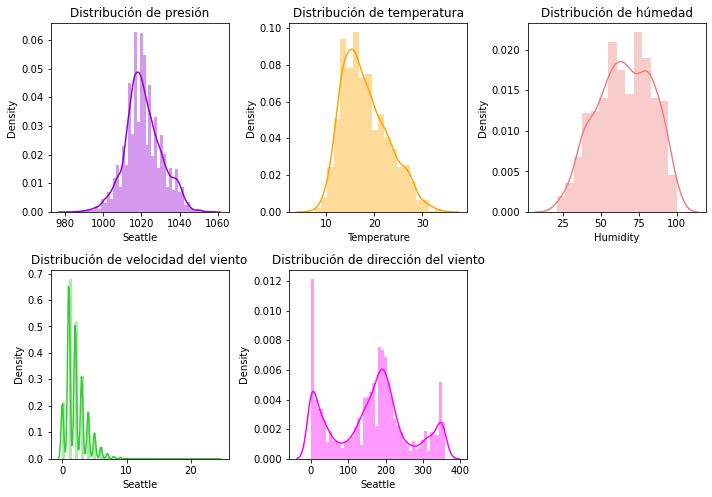

In [60]:
#Gráfica de distribución usando funciones de python:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.distplot(presion,color='darkviolet')
plt.title('Distribución de presión')
plt.subplot(3,3,2)
sns.distplot(temper,color='orange')
plt.title('Distribución de temperatura')
plt.subplot(3,3,3)
sns.distplot(humedad,color='lightcoral')
plt.title('Distribución de húmedad')
plt.subplot(3,3,4)
sns.distplot(wind_speed,color='limegreen')
plt.title('Distribución de velocidad del viento')
plt.subplot(3,3,5)
sns.distplot(wind_dir,color='fuchsia')
plt.title('Distribución de dirección del viento')
plt.tight_layout()
plt.show()


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## <font color='navy'> Categorización de Variables Aleatorias:

Separamos los datos por estaciones de manera que primavera corresponde al número 1, verano al número 2, otoño al número 3 e invierno al número 4 ya que teniendo esos datos de manera cualitativa es más sencillo hacer el análisis y gráficado por estación y en consecuencia ayuda a tener un pronóstico más preciso.

In [19]:
dataframe = pd.DataFrame(columns=["Datetime",'Humidity','Temperature','Pressure',"Wind_speed"], dtype='float')
dataframe["Datetime"]= data2.datetime
dataframe["Humidity"]=humedad
dataframe["Temperature"]=temper
dataframe["Pressure"]=presion
dataframe["Wind_speed"]=wind_speed

time=pd.DatetimeIndex(dataframe['Datetime'])
dataframe['date']=time.date
dataframe['year']=time.year
dataframe['month']=time.month
dataframe['day']=time.day
dataframe['time']=time.time
dataframe["season"]=dataframe["month"]
    
               
#Separación por estaciones
#tabla2.sample(2)

primavera = lambda x: True if (x == 3 or x == 4 or x == 5) else False
verano = lambda x: True if (x == 6 or x == 7 or x == 8) else False
otono = lambda x: True if (x == 9 or x == 10 or x == 11) else False
invierno = lambda x: True if (x == 1 or x == 2 or x == 12) else False
temp = 0
for i in range(len(dataframe["month"])):
    temp = dataframe["month"][i]
    if primavera(temp):
        dataframe["season"][i] = 1
    elif verano(temp):
        dataframe["season"][i] = 2
    elif otono(temp):
        dataframe["season"][i] = 3
    elif invierno(temp):
        dataframe["season"][i] = 4
#dataframe.sample(8)
dataframe.drop('Datetime', inplace=True,axis=1)
dataframe.drop('year', inplace=True,axis=1)
dataframe.drop('month', inplace=True,axis=1)
dataframe.drop('day', inplace=True,axis=1)
dataframe.drop('time', inplace=True,axis=1)
dataframe.sample(3)

,Humidity,Temperature,Pressure,Wind_speed,date,season
22801,75.0,9.515667,1031.0,0.0,2015-05-09,1
12462,93.0,8.480000,1014.0,0.0,2014-03-04,1
22346,81.0,8.467667,1027.0,1.0,2015-04-20,1


In [20]:
dataframe.describe()

,Humidity,Temperature,Pressure,Wind_speed,season
count,44964.000000,45250.000000,45240.000000,45252.000000,45253.000000
mean,77.159038,11.259626,1021.001216,2.118116,2.507303
std,18.147464,6.547986,9.737187,1.629988,1.102848
min,13.000000,-9.370000,980.000000,0.000000,1.000000
25%,66.000000,6.680000,1015.000000,1.000000,2.000000
50%,81.000000,10.790000,1020.000000,2.000000,3.000000
75%,93.000000,15.380000,1027.000000,3.000000,3.000000
max,100.000000,34.150000,1058.000000,24.000000,4.000000


## <font color='navy'> Correlación de variables:

In [21]:
#Crear data frame de variables cuantitativas para Seattle:
tabla = pd.DataFrame(columns=['Humidity','Temperature','Pressure',"Wind_speed"], dtype='float')
tabla["Humidity"]=humedad
tabla["Temperature"]=temper
tabla["Pressure"]=presion
tabla["Wind_speed"]=wind_speed
#tabla.sample(3)
#Método de correlación de Pearson:
dataframe.corr(method="pearson")

,Humidity,Temperature,Pressure,Wind_speed,season
Humidity,1.000000,-0.566657,-0.068157,-0.033302,0.286764
Temperature,-0.566657,1.000000,-0.077830,0.063496,-0.407793
Pressure,-0.068157,-0.077830,1.000000,-0.285729,0.011887
Wind_speed,-0.033302,0.063496,-0.285729,1.000000,0.006337
season,0.286764,-0.407793,0.011887,0.006337,1.000000


* La correlación de variables nos dice que humedad y temperatura tiene una correlación más significativa que ninguna otra varible y esta es inversa, es decir, mientras una aumenta la otra disminuye.
* Aunque nuestro objetivo es centrarnos en un sóla estación utilizamos todas en el dataframe y todavía no filtramos para poder gráficar el boxplot y compararlas entre sí, de esa manera y teniendo ya conocimiento de la correlación de las variables será más sencillo realizar la elección de estación.

## <font color='navy'> Boxplot:

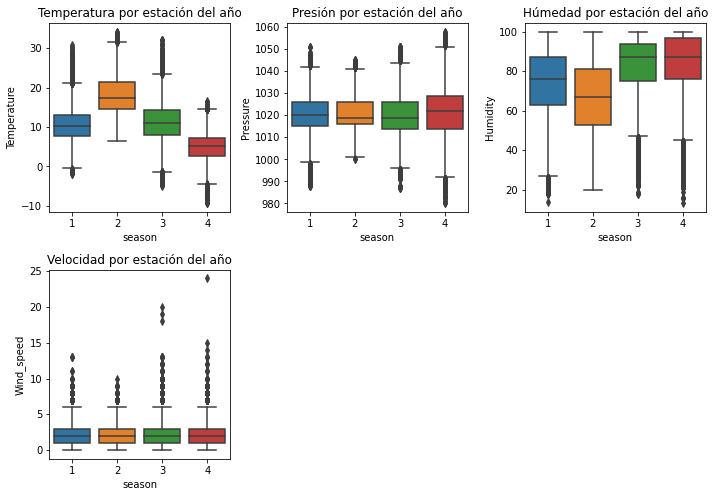

In [22]:
#Boxplot por estación:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x="season",y='Temperature',data=dataframe)
plt.title('Temperatura por estación del año')
plt.subplot(3,3,2)
sns.boxplot(x='season',y='Pressure',data=dataframe)
plt.title('Presión por estación del año')
plt.subplot(3,3,3)
sns.boxplot(x='season',y='Humidity',data=dataframe)
plt.title('Húmedad por estación del año')
plt.subplot(3,3,4)
sns.boxplot(x='season',y='Wind_speed',data=dataframe)
plt.title('Velocidad por estación del año')
plt.tight_layout()
plt.show()

Box-plot análisis:
    
- Usamos la técnica de boxplot para comparar grupos, en este caso estaciones y de esa manera hacer más clara la elección de con cual estación trabajaremos exclusivamente

- Decidimos quedarnos con verano ya que es la estación con menos humedad y con más temperatura por lo que eso disminuye la probabilidad de lluvia así que podemos lanzar nuestra promoción con un menor riesgo de pérdidas, además en el análisis de correlación observamos que hay una relación inversa entre estas dos variables y si la temperatura es alta y la humedad relativamente baja entonces las gotas de lluvia podrían evaporarse antes de llegar a la superficie.

- Los valores mayores en temperatura los tiene verano y los valores menores en humedad los tiene también verano; sin contar los valores atípicos de humedad de las otras variables ya que estos son mínimos. 

### Filtrado de datos por estación:

In [23]:
filtrado = dataframe["season"] == 2 #el 2 corresponde a verano
#filtrado.sample(10)
df_filtrado = dataframe[filtrado]
df_filtrado.head()

,Humidity,Temperature,Pressure,Wind_speed,date,season
5820,54.0,14.93,1041.0,0.0,2013-06-01,2
5821,58.0,14.39,1041.0,0.0,2013-06-01,2
5822,58.0,14.00,1042.0,0.0,2013-06-01,2
5823,71.0,13.43,1023.0,5.0,2013-06-01,2
5824,76.0,12.65,1023.0,5.0,2013-06-01,2


## Limpieza de datos: 

* En resumen lo que hicimos fue eliminar todos los valores NA, no los rellenamos con ceros ya que no tiene sentido por el tipo de variables (temperatura, humedad, etc) ni con ningún otro valor ya que realmente no era ni el 0.1% de los datos; en total cada variable tiene alrededor de 45,000 datos y eran apenas unos cuantos NA que no hacen ninguna diferencia en nuestro análisis porque no son significativos.

* Filtramos los datos a solamente los de la ciudad de Seattle en Estados Unidos porque es en donde está nuestro auto-lavado además de que tiene reputación de ser una ciudad lluviosa lo cual hace un análisis más interesante.

* También eliminamos las variables categoricas y datos innecesarios para calcular las funciones de probabilidad. 

* Por último, después de realizar el análisis de box-plot y las correlaciones entre variables hicimos un filtrado por estación, quedandonos así con solamente los datos de verano en nuestro DataFrame.

## <font color='red'>  Nodo 1: Humedad

In [24]:
#Data frame con los datos de Humedad, el número de veces que existe cada uno, su probabilidad de ocurrencia y la probabilidad acumulada:
df_humedad = pd.DataFrame(columns=["Humedad","Número_veces","Probabilidad","Prob_acumulada"], dtype='float')
df_humedad["Humedad"]= np.unique(df_filtrado.Humidity, return_counts=True)[0]
df_humedad["Número_veces"]=np.unique(df_filtrado.Humidity, return_counts=True)[1]
df_humedad["Probabilidad"]=df_humedad['Número_veces']/len(df_filtrado.Humidity)
df_humedad["Prob_acumulada"]=df_humedad.Probabilidad.cumsum()
df_humedad
humedad = df_filtrado.Humidity.sample(1000)

Text(0.5, 1.0, 'Probabilidad de humedad para Verano en Seattle')

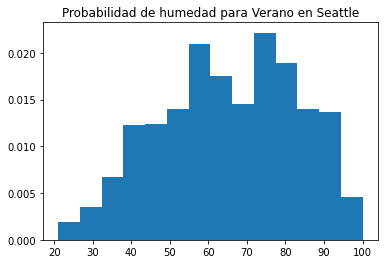

In [25]:
#Histograma de Humedad
y,x,_ = plt.hist(humedad,bins="auto",density=True);
plt.title("Probabilidad de humedad para Verano en Seattle")

- No parece adaptarse a una distribución normal, aunque podría ser asimétrica hacia la izquierda.

## Funciones de ajuste de distribución:

### Ajuste de distribución por Scipy:

Con esta función se intenta estimar cual es la distribución que mejor se ajusta a nuestros datos 

### Planteamiento de la hipótesis

> $H_0$: Los datos tienen una distribución argus 

> $H_a$: Los datos no tienen una distribución argus 

(0.002077587174360882, 19.98776818598207, 80.94811631930439)

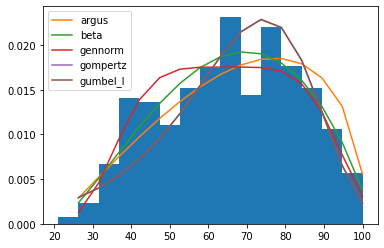

In [55]:
dist, p = best_fit_params(df_filtrado.Humidity)
p

De acuerdo a Scipy, la distribución que mejor se ajusta es la distribución Argus, con parámetros ~0, ~ 20 y ~ 81.

### Comprobación de distribución Argus con prueba de Chi Cuadrada

In [56]:
chi2(dist,p,y,x[:-1])

Valor teórico de Chi2 = inf
Valor por librería de Chi2 = Power_divergenceResult(statistic=inf, pvalue=0.0)
Estadístico de Chi2 = 30.14352720564616


* Consideramos que el p value es bajo por lo tanto no podemos rechazar la hipotesis alternativa de que los datos no se ajustan a una distribución argus

### Kernel density estimation:

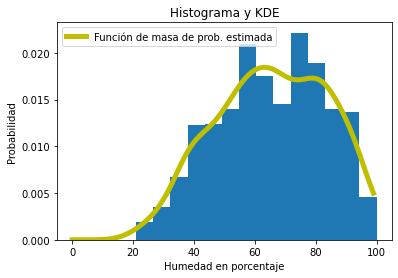

In [57]:
dom = np.arange(0,100) #Dominio de la variable
plt.hist(humedad,bins="auto",density=True)
f = kde_statsmodels_m(humedad)
plt.plot(dom, f(dom), label='Función de masa de prob. estimada', color='y', linewidth=5)
plt.xlabel('Humedad en porcentaje')
plt.ylabel('Probabilidad')
plt.title("Histograma y KDE")
plt.legend()
plt.show()

* En la gráfica podemos observar que se ajusta mejor a los datos ya que tiene más curvas.

## Creación de Variables Aleatorias

### Método de la transformada Inversa:

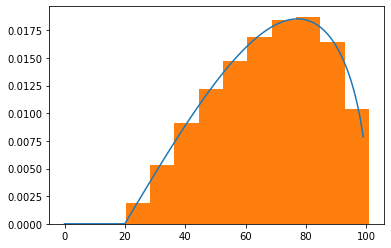

In [58]:
# A partir de la distribución obtenida por Scipy, argus
humedad_aleatoria1 = trans_inversa(dist,p,10000)
plt.plot(dom,dist(*p).pdf(dom))
plt.hist(humedad_aleatoria1,density=True);

* En esta gráfica la distribución parece más suavizada a simple vista, sin embargo, el histograma a pesar de que se parezca a los datos reales los valores aleatorios no tiene tantos picos como los datos originales por lo que era de esperarse que la distribución se adaptara mejor así que no nos parece tan precisa.

### Método aceptación y rechazo a partir de estratificación:

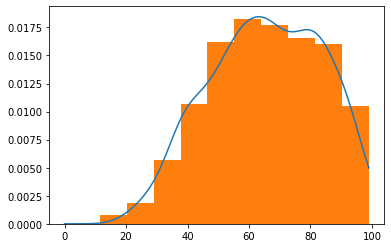

In [59]:
#Creación de uniformes estratificados
#Método aceptación/rechazo a partir de la función generada por KDE
# Máximo de la función
maximo = max_func(f,dom)
humedad_aleatoria2 = a_r(f,maximo,dom)
plt.plot(dom,f(dom))
plt.hist(humedad_aleatoria2,density=True);



In [31]:
media_estratificada=np.mean(humedad_aleatoria2)
media_real=np.mean(humedad)
print('Media estratificada:', media_estratificada)
print('Media datos originales: ', media_real)
de_estratificada=np.std(humedad_aleatoria2)
de_real=np.std(humedad)
print('Desviación estándar estratificada:', de_estratificada)
print('Desviación estándar con datos originales: ', de_real)

Media estratificada: 65.11313854775493
Media datos originales:  65.642
Desviación estándar estratificada: 17.79132932836078
Desviación estándar con datos originales:  18.201259187210088


* El método de aceptación y rechazo adapta más la distribución a nuestros datos reales además de que sus medias y desviación estándar son muy parecidas.

* Por lo tanto nos quedamos con KDE -> Aceptación/rechazo ya que se ajusta mejor a los datos originales.

## Pruebas de Bondad de Ajuste e Hipótesis

### Prueba de Intervalo de Confianza de la Media

In [32]:
# Verdadera Media de la Humedad en Verano
media_og = humedad.mean()
media_og

65.642

In [33]:
# Prueba de intervalo de confianza, Primera variable aleatoria generada
intervalo_confianza(media_og,humedad_aleatoria1,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (65.39890986564714, 66.1296051673288)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (65.39895409036862, 66.12956094260733)
Media calculada 65.76425751648797
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6826013260235826) U (t>0.6826013260235826)
Se acepta la hipótesis nula, la media es igual a 65.76425751648797 con un 0.95 % de confianza.


In [34]:
# Prueba de intervalo de confianza, Segunda variable aleatoria generada
intervalo_confianza(media_og,humedad_aleatoria2,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (64.00855076710364, 66.21772632840621)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (64.00988903144034, 66.21638806406952)
Media calculada 65.11313854775493
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6825546003581691) U (t>0.6825546003581691)
Se acepta la hipótesis nula, la media es igual a 65.11313854775493 con un 0.95 % de confianza.


Como la media de la variable aleatoria generada se asemeja bastante a la media de los datos originales, podemos decir que la variable aleatoria simula a los datos originales.

## Conclusiones del Nodo Humedad:

El nodo 1 corresponde a la humedad de Seattle en el verano y su media tiene un valor de 66.601 lo cual quiere decir que durante esta temporada la humedad es de más de 60% comparado con el valor minimo que quizá suena muy alto pero es la estación con menor humedad.

No es muy puntual modelarla con una distribución Argus ya que el P value es de 0.60 lo cual no nos da precisión, la que mejor se ajusta es una distribución a través de Kernel Density Estimation por el método de aceptación y rechazo ya que de esta manera conservamos la esencia de los datos originales y la distribución se adapta ligeramente a ellos y no los datos a la distribución. 


## <font color='red'>  Nodo 2: Temperatura

In [35]:
#Data frame con los datos de Temperatura, el número de veces que existe cada uno y su probabilidad de ocurrencia:
df_temper = pd.DataFrame(columns=["Temperaturas","Número_veces","Probabilidad","Prob_acumulada"], dtype='float')
df_temper["Temperaturas"]= np.unique(df_filtrado.Temperature, return_counts=True)[0]
df_temper["Número_veces"]=np.unique(df_filtrado.Temperature, return_counts=True)[1]
df_temper["Probabilidad"]=df_temper['Número_veces']/len(df_filtrado.Temperature)
df_temper["Prob_acumulada"]=df_temper.Probabilidad.cumsum()
df_temper.sample(3)
temper = df_filtrado.Temperature.sample(1000)

Text(0.5, 1.0, 'Probabilidad de temperatura para Verano en Seattle')

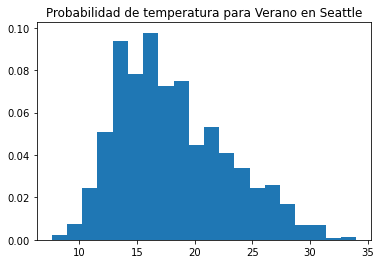

In [36]:
#Histograma de Temperatura
y,x,_ = plt.hist(temper,bins="auto",density=True);
plt.title("Probabilidad de temperatura para Verano en Seattle")

- Podría asemejarse a una distribución normal asimétrica a la derecha.

## Funciones de ajuste de distribución:

### Ajuste de distribución por Scipy:

Con esta función se intenta estimar cual es la distribución que mejor se ajusta a nuestros datos 

### Planteamiento de la hipótesis

> $H_0$: Los datos tienen una distribución genextreme  

> $H_a$: Los datos no tienen una distribución genextreme 

(0.05476165184579991, 16.001991203190315, 3.961038679677699)

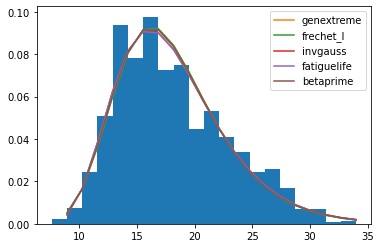

In [65]:
dist, p = best_fit_params(temper)
p

* De acuerdo con la gráfica la distribución que mejor se ajusta es genextreme

### Comprobación de distribución genextreme con prueba de Chi Cuadrada

In [38]:
chi2(dist,p,y,x[:-1])

Valor teórico de Chi2 = 12.054628022589968
Valor por librería de Chi2 = Power_divergenceResult(statistic=12.054628022589968, pvalue=0.8832770400182971)
Estadístico de Chi2 = 30.14352720564616


* El p value es alto por lo tanto no podemos rechazar la hipótesis nula de que la distribución se puede representar como una distribución genextreme.

### Kernel density estimation:

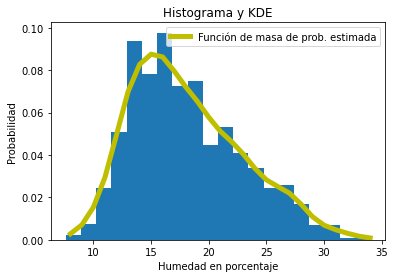

In [63]:
dom = np.arange(8,35) #Dominio de la variable
plt.hist(temper,bins="auto",density=True)
f = kde_statsmodels_m(temper)
plt.plot(dom, f(dom), label='Función de masa de prob. estimada', color='y', linewidth=5)
plt.xlabel('Humedad en porcentaje')
plt.ylabel('Probabilidad')
plt.title("Histograma y KDE")
plt.legend()
plt.show()

* En la gráfica se puede observar que se ajusta muy bien a los datos.

## Creación de Variables Aleatorias

### Método de la transformada Inversa:

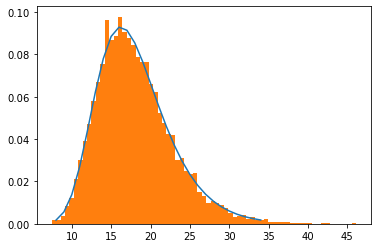

In [66]:
# A partir de la distribución obtenida por Scipy, Frechet
temper_aleatoria1 = trans_inversa(dist,p,10000)
plt.plot(dom,dist(*p).pdf(dom))
plt.hist(temper_aleatoria1,bins = "auto",density=True);

* El método de la transformada a partir de la dsitribución creada con Scipy (Frechet) se ve mucho más preciso a comparación del KDE.

### Método aceptación y rechazo a partir de estratificación:

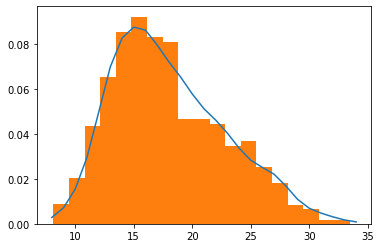

In [68]:
#Creación de uniformes estratificados
#Método aceptación/rechazo a partir de la función generada por KDE
# Máximo de la función
maximo = max_func(f,dom)
temper_aleatoria2 = a_r(f,maximo,dom)
plt.plot(dom,f(dom))
plt.hist(temper_aleatoria2,bins="auto",density=True);

In [42]:
media_estratificada=np.mean(temper_aleatoria2)
media_real=np.mean(temper)
print('Media estratificada:', media_estratificada)
print('Media datos originales: ', media_real)
de_estratificada=np.std(temper_aleatoria2)
de_real=np.std(temper)
print('Desviación estándar estratificada:', de_estratificada)
print('Desviación estándar con datos originales: ', de_real)

Media estratificada: 18.12961819178021
Media datos originales:  18.114505056741038
Desviación estándar estratificada: 4.9017118403134
Desviación estándar con datos originales:  4.753074853505662


* A pesar de que la media y la desviación estándar son relativamente muy parecidas, visualmente se puede apreciar que el método de aceptación y rechazo a partir de KDE no se adapta tan bien a los datos como el de la transformada inversa por a partir del método de Scipy.

## Pruebas de Bondad de Ajuste e Hipótesis

### Prueba de Intervalo de Confianza de la Media

In [43]:
# Verdadera Media de la Humedad en Verano
media_og = temper.mean()
media_og

18.114505056741038

In [44]:
# Prueba de intervalo de confianza, Primera variable aleatoria generada
intervalo_confianza(media_og,temper_aleatoria1,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (18.070756337173286, 18.258748720362142)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (18.070767715254913, 18.258737342280515)
Media calculada 18.164752528767714
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6826013260235826) U (t>0.6826013260235826)
Se acepta la hipótesis nula, la media es igual a 18.164752528767714 con un 0.95 % de confianza.


In [45]:
# Prueba de intervalo de confianza, Segunda variable aleatoria generada
intervalo_confianza(media_og,temper_aleatoria2,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (17.8252918031695, 18.43394458039092)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (17.825660510084173, 18.433575873476247)
Media calculada 18.12961819178021
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6825546003581691) U (t>0.6825546003581691)
Se acepta la hipótesis nula, la media es igual a 18.12961819178021 con un 0.95 % de confianza.


## Conclusiones del Nodo: Temperatura

El nodo 2 corresponde a temperatura, originalmente dado por grados Kelvin pero convertidos a Celsius y la media es de 18 grados Celsius siendo verano la temporada que presenta valores más altos con un máximo de 33.81 grados Celsius.

Nos resulta más adecuado modelar la distribución con el método de la transformada a partir de la distribución creada con Scipy (genextreme) ya que gráficamente es muy parecida a los datos representados en el histograma y además la Prueba de Hipótesis que creamos desde la función de Scipy nos arrojó un P Value mayor al 80% por lo que no podemos rechazar la hipótesis nula.

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.




### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.


### 1.7 Referencias.
> - "USDA Plant Hardiness Zone Map". United States Department of Agriculture. Archived from the original on February 27, 2014. 
> - Met, Duncan Clark y la oficina. «How will climate change affect rainfall?» The Guardian, 15 de Diciembre de 2011: 107.
Clima y precipitaciones en Seattle

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Ivette Landaverde and Diego Pintor.
</footer>